<a href="https://colab.research.google.com/github/oqeshaaccc/Car_sale_analysis/blob/main/Car_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Sales Analysis**

## Import Packages

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creating the DataFrame for the csv Input

In [23]:
data = pd.read_csv("Car_sales.csv")
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


## Data Processing and Cleaning

##### Checking for NaN values in our data

In [24]:
data.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

##### What are the types of data we have in the columns of the data

In [25]:
data.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

##### Dropped the column, **__year_resale_value**, from the DataFrame since it has too many NaN values and will not be useful in our analysis.

In [26]:
data.drop(['__year_resale_value'], axis=1, inplace=True)
data.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


##### Replacing the Nan values in our columns with either mean, median, or mode depending on the rest of the values in each column respectively.

Replacing Nan values in **Horsepower** with the mode

In [27]:
hp_mode = data['Horsepower'].mode()[0]
data['Horsepower'].replace(np.nan, hp_mode, inplace=True)

Replacing Nan values in **Price_in_thousands** with the mean

In [28]:
price_mean = data['Price_in_thousands'].mean()
data['Price_in_thousands'].replace(np.nan, price_mean, inplace=True)

Replacing Nan values in **Engine_size** with the mode

In [29]:
es_mode = data['Engine_size'].mode()[0]
data['Engine_size'].replace(np.nan, es_mode, inplace=True)

Replacing Nan values in **Wheelbase** with the median

In [30]:
wb_median = data['Wheelbase'].median()
data['Wheelbase'].replace(np.nan, wb_median, inplace=True)

Replacing Nan values in **Width** & **Length** with the mean

In [31]:
width_mean = data['Width'].mean()
length_mean = data['Length'].mean()

data['Width'].replace(np.nan, width_mean, inplace=True)
data['Length'].replace(np.nan, length_mean, inplace=True)

Replacing Nan values in **Curb_weight** with the mean

In [32]:
curb_mean = data['Curb_weight'].mean()
data['Curb_weight'].replace(np.nan, curb_mean, inplace = True)

Replacing Nan values in **Fuel_capacity** with the mode when the associated value in the row for Engine_size=2.0

We did this because we replaced the NaN values in **Engine_size** with the mode which was 2. 

In [33]:
# data[data['Engine_size']==2.0]
fc_mode = data.loc[data['Engine_size'] == 2.0, 'Fuel_capacity'].mode()[0]
data['Fuel_capacity'].replace(np.nan, fc_mode, inplace=True)

Replacing Nan values in **Fuel_efficiency** with the mode

In [34]:
fe_mode = data['Fuel_efficiency'].mode()[0]
data['Fuel_efficiency'].replace(np.nan, fe_mode, inplace=True)

Replacing Nan values in **Power_perf_factor** with the mean

In [35]:
power_perf_mean = data['Power_perf_factor'].mean()
data['Power_perf_factor'].replace(np.nan, power_perf_mean, inplace=True)

## View some Descriptive Stats of our Data

In [36]:
data.shape

(157, 15)

In [37]:
data.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [38]:
data.describe()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,27.390755,3.054140,185.719745,107.484076,71.15000,187.343590,3.378026,17.929936,23.866242,77.043591
std,68.029422,14.259359,1.044736,56.591070,7.616872,3.44079,13.388635,0.626447,3.885220,4.244296,24.980973
min,0.110000,9.235000,1.000000,55.000000,92.600000,62.60000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,18.145000,2.300000,150.000000,103.000000,68.40000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,23.400000,3.000000,175.000000,107.000000,70.60000,187.800000,3.368000,17.200000,24.000000,72.290355
75%,67.956000,31.930000,3.500000,215.000000,112.200000,73.40000,196.100000,3.778000,19.500000,26.000000,89.401935
max,540.561000,85.500000,8.000000,450.000000,138.700000,79.90000,224.500000,5.572000,32.000000,45.000000,188.144323


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  157 non-null    float64
 5   Engine_size         157 non-null    float64
 6   Horsepower          157 non-null    float64
 7   Wheelbase           157 non-null    float64
 8   Width               157 non-null    float64
 9   Length              157 non-null    float64
 10  Curb_weight         157 non-null    float64
 11  Fuel_capacity       157 non-null    float64
 12  Fuel_efficiency     157 non-null    float64
 13  Latest_Launch       157 non-null    object 
 14  Power_perf_factor   157 non-null    float64
dtypes: float64(11), object(4)
memory usage: 18.5+ KB


## Some quick analysis of our data

In [40]:
data['Horsepower']

0      140.0
1      225.0
2      225.0
3      210.0
4      150.0
       ...  
152    160.0
153    168.0
154    168.0
155    236.0
156    201.0
Name: Horsepower, Length: 157, dtype: float64

Creating a histogram displaying the frquency of Horsepower grouped into bins

In [41]:
count, bin_edges = np.histogram(data['Horsepower'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[ 2 27 45 42 22 10  7  1  0  1]
[ 55.   94.5 134.  173.5 213.  252.5 292.  331.5 371.  410.5 450. ]


Text(0.5, 0, 'Horse Power')

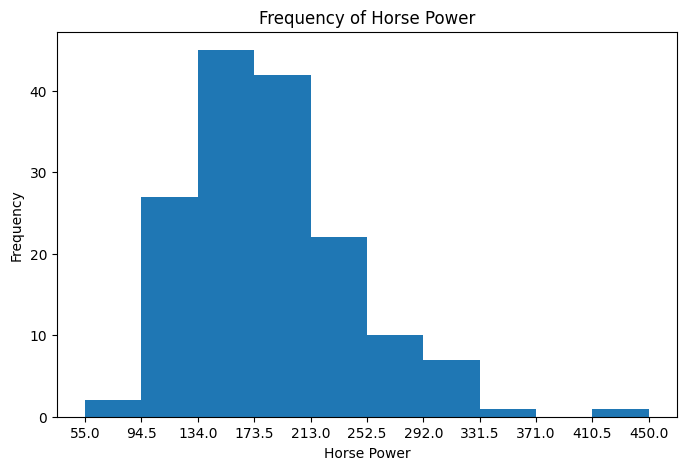

In [42]:
data['Horsepower'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Frequency of Horse Power')
plt.xlabel('Horse Power')

Count of the amount of car sales each Car Manufacturer has in our data 

In [43]:
data['Manufacturer'].value_counts()

Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

Grouping the Data by Manufacturer and Model of the cars

In [44]:
data_new = data.groupby(['Manufacturer','Model']).sum()
data_new

Sales_in_thousands  Price_in_thousands  Engine_size  \
Manufacturer Model                                                          
Acura        CL                   14.114           27.390755          3.2   
             Integra              16.919           21.500000          1.8   
             RL                    8.588           42.000000          3.5   
             TL                   39.384           28.400000          3.2   
Audi         A4                   20.397           23.990000          1.8   
...                                  ...                 ...          ...   
Volvo        S40                  16.957           23.400000          1.9   
             S70                  15.245           27.500000          2.4   
             S80                  18.969           36.000000          2.9   
             V40                   3.545           24.400000          1.9   
             V70                  17.531           28.800000          2.4   

                      Horsepower  Wheelbase  Width  Length  Curb_weight  \
Manufacturer Model                                                        
Acura        CL            225.0      106.9   70.6   192.0        3.470   
             Integra       140.0      101.2   67.3   172.4        2.639   
             RL            210.0      114.6   71.4   196.6        3.850   
             TL            225.0      108.1   70.3   192.9        3.517   
Audi         A4            150.0      102.6   68.2   178.0        2.998   
...                          ...        ...    ...     ...          ...   
Volvo        S40           160.0      100.5   67.6   176.6        2.998   
             S70           168.0      104.9   69.3   185.9        3.208   
             S80           201.0      109.9   72.1   189.8        3.600   
             V40           160.0      100.5   67.6   176.6        3.042   
             V70           168.0      104.9   69.3   186.2        3.259   

                      Fuel_capacity  Fuel_efficiency  Power_perf_factor  
Manufacturer Model                                                       
Acura        CL                17.2             26.0          77.043591  
             Integra           13.2             28.0          58.280150  
             RL                18.0             22.0          91.389779  
             TL                17.2             25.0          91.370778  
Audi         A4                16.4             27.0          62.777639  
...                             ...              ...                ...  
Volvo        S40               15.8             25.0          66.113057  
             S70               17.9             25.0          70.654495  
             S80               21.1             24.0          85.735655  
             V40               15.8             25.0          66.498812  
             V70               17.9             25.0          71.155978  

[157 rows x 11 columns]

Created a dataframe of cars Manufactured by Volvo

In [45]:
volvo_data = data[data['Manufacturer']=='Volvo']
volvo_data

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
151,Volvo,S40,16.957,Passenger,23.4,1.9,160.0,100.5,67.6,176.6,2.998,15.8,25.0,2/18/2011,66.113057
152,Volvo,V40,3.545,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


Creating a graphic comparing the different Volvo Models vs the amount Sold of each car (in thousands) 

In [46]:
import matplotlib.pyplot as plt 

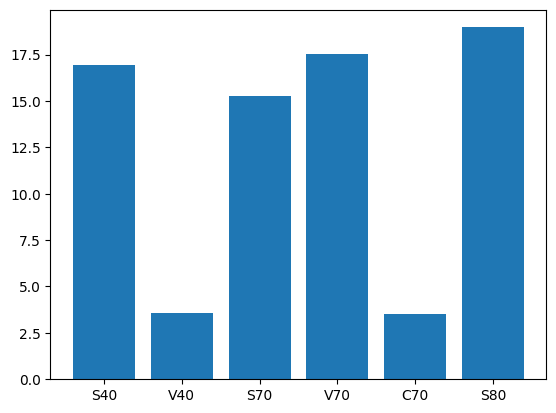

In [47]:
model = volvo_data['Model']
sales = volvo_data['Sales_in_thousands']

plt.bar(model, sales)
plt.show()

In [48]:
data.corr()['Price_in_thousands'].sort_values()

Fuel_efficiency      -0.492140
Sales_in_thousands   -0.304413
Wheelbase             0.110510
Length                0.156874
Width                 0.329109
Fuel_capacity         0.422165
Curb_weight           0.523753
Engine_size           0.624777
Horsepower            0.837372
Power_perf_factor     0.897945
Price_in_thousands    1.000000
Name: Price_in_thousands, dtype: float64

## Creating Combo Chart Visualizations

To create our visualizations we used the Dataset called CarSales, which shows various stats about car model sales.

We grouped our data by car manufacturers and then decided to use Volve for our analysis.

### Creating the Combo Chart using **matplotlib**



Description:

For this chart we are using Matplotlib to create a combo chart showing the relationship between the amount of sales and price of the different models of Volvo Cars. 

We plot the different models along the x axis and have the sales (in thousands) on the left y axis and the price (in thousands) on the right y axis.

Price is displayed as a bar chart and Sales is shown as a line graph on top of the bars.


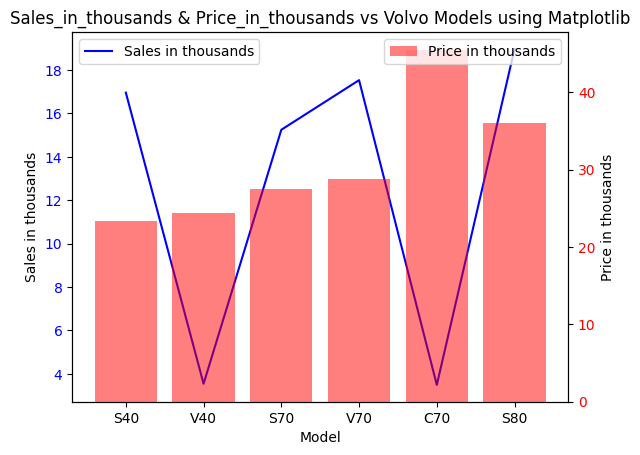

In [49]:
# -1- Implementing Combo Chart Using matplotlib

import matplotlib.pyplot as plt

df = data[data['Manufacturer']=='Volvo']

# Create sample data
x = df['Model']
y1 = df['Sales_in_thousands']
y2 = df['Price_in_thousands']

# Create the figure and axis objects
fig, ax1 = plt.subplots()

# Create the first axis (left y-axis)
ax1.set_xlabel('Model')
ax1.set_ylabel('Sales in thousands')
ax1.plot(x, y1, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second axis (right y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Price in thousands')
ax2.bar(x, y2, color='red', alpha=0.5)
ax2.tick_params(axis='y', labelcolor='red')

# Add legend
ax1.legend(['Sales in thousands'], loc='upper left')
ax2.legend(['Price in thousands'], loc='upper right')

plt.title('Sales_in_thousands & Price_in_thousands vs Volvo Models using Matplotlib')

plt.show()

### Implementing Combo Chart Using **Seaborn**

Description:

For this chart we are using Seaborn to create a combo chart showing the relationship between the amount of sales and price of the different models of Volvo Cars.

We plot the different models along the x axis and have the sales (in thousands) on the left y axis and the price (in thousands) on the right y axis.

Price is displayed as a bar chart and Sales is shown as a line graph on top of the bars

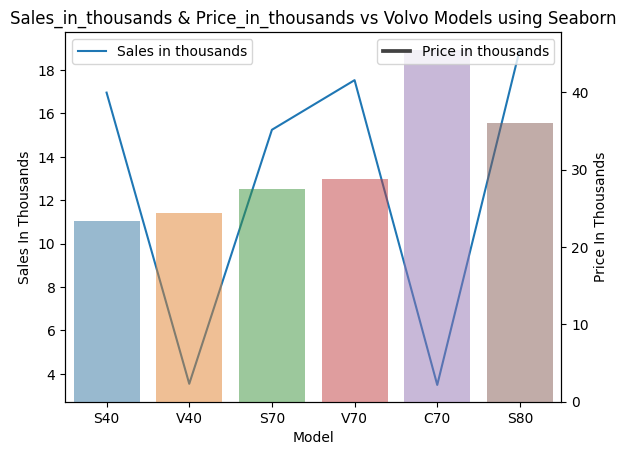

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

df = data[data['Manufacturer']=='Volvo']

# Create the figure and axis objects
fig, ax1 = plt.subplots()

# Create the first axis (left y-axis)
sns.lineplot(data=df, x='Model', y='Sales_in_thousands', ax=ax1)

# Create the second axis (right y-axis)
ax2 = ax1.twinx()
sns.barplot(data=df, x='Model', y='Price_in_thousands', ax=ax2, alpha=0.5)

# Set labels
ax1.set_xlabel('Model')
ax1.set_ylabel('Sales In Thousands')
ax2.set_ylabel('Price In Thousands')

# Add legend
ax1.legend(['Sales in thousands'], loc='upper left')
ax2.legend(['Price in thousands'], loc='upper right')

plt.title('Sales_in_thousands & Price_in_thousands vs Volvo Models using Seaborn')
plt.show()

### Implementing Combo Chart Using **Plotly**

Description:

For this chart we are using Plotly to create a combo chart showing the relationship between the amount of sales and price of the different models of Volvo Cars.

We plot the different models along the x axis and have the sales (in thousands) along with the price (in thousands) on the y axis.

The scale of the y axis is different for this chart since we are showing both sales and price (in thousands) on the same axis. 

Price is displayed as a bar chart and Sales is shown as a line graph on top of the bars

In [51]:
import plotly.graph_objects as go
import pandas as pd

# Load sample data
df = data[data['Manufacturer']=='Volvo']

# Create the figure object
fig = go.Figure()

# Create the first trace (line chart)
fig.add_trace(go.Scatter(x=df['Model'], y=df['Sales_in_thousands'], mode='lines', name='Sales Vs Model'))

# Create the second trace (bar chart)
fig.add_trace(go.Bar(x=df['Model'], y=df['Price_in_thousands'], name='Price Vs Model'))

# Set layout
fig.update_layout(title='Sales_in_thousands & Price_in_thousands vs Volvo Models using Plotly', yaxis_title='Scale in thousands', xaxis_title='Model')

fig.show()

**In Conclusion:** 

In this project, we worked with the CarSales dataser. We created 3 Combo Chart Visualizations comparing the Sales_in_thousands and Price_in_thousands variables for different Models of Volvo cars. 

We grouped our data by Manufacturers and then decided to just look at Volve Models for our analysis. Using the **Matplotlib**, **Seaborn**, and **Plotly** libraries we generated our combo charts with Sales_in_thousands and Price_in_thousands in our y-axis and Volvo Models along the x-axis.

Comparing the visualizations we made using the 3 different libraries, we decided that using the **Plotly** library was our preferred method. This was the best choice for us since we enjoyed the interactiveness of the chart and the scaling the y-axis differed from the other charts. With Plotly, it changed the scale used in the y-axis to include both our variables instead of having two separate y-axises plotted at the same time. 

### Analysis of Results from Charts

From the charts above, we can see that generally if the price of a car model is high then the sales will tend to be lower, although there are instances where this isn't true. To see why that would be the case requires some further analysis.

In the future if we were to continue analysis of this data further, a few things we could do are:
  - Create visualizations for comparing Sales and Price for car Models of the other car Manufacturers
  - Test which other variables have an effect on the price variable


## Creating a Waffle Chart

Using the same Dataset, CarSales, we create a waffle chart to visualize the variable 'Vehicle_type'

In [52]:
data['Vehicle_type'].unique()

array(['Passenger', 'Car'], dtype=object)

Importing the Library to build our Waffle Chart

In [53]:
!pip install pywaffle
#from pywaffle import Waffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 34.0 MB/s eta 0:00:00


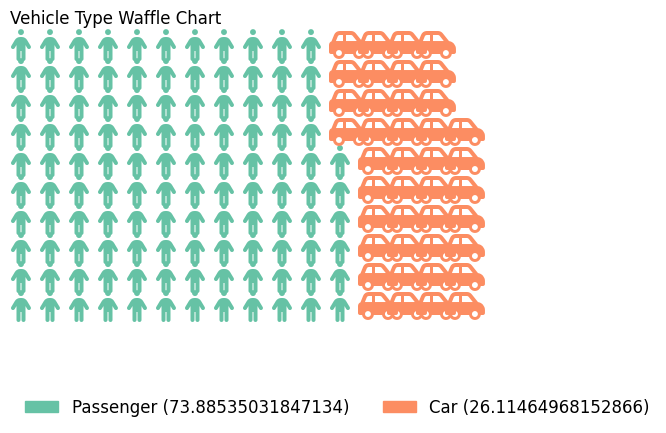

In [66]:
from pywaffle import Waffle

# Data
volv_df = data['Vehicle_type']
value = volv_df.value_counts()

value_dict = value.to_dict() 
#store each vehicle type and its count in a dictionary as this will help with the labels and legend for the waffle chart


# Waffle chart
plt.figure(
    FigureClass = Waffle,
    rows = 10,
    values = value,
    icons=['person', 'car-side'],
    title = {'label':'Vehicle Type Waffle Chart',
             'loc': 'left'}, labels=[f"{k} ({(v / sum(value_dict.values()) * 100)})" for k, v in value_dict.items()],
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 12
    }), 


plt.show()

The waffle chart we have generated shows us the frequency of the values in our Vehicle_type column. As you can see from the illustration, approximately 74% of the cars in our dataset are passenger vehicles, while the other 26% are just cars. 

## Generating a Word Cloud

Using the unique values in the Manucaturer column of our dataset, we create a word cloud to display which Manufacturers occur most in our data

In [55]:
data['Manufacturer'].value_counts()

Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

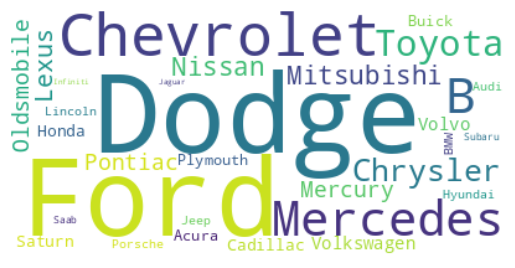

In [56]:
from wordcloud import WordCloud
#Importing Dataset

#Creating the text variable
text = " ".join(cat for cat in data['Manufacturer'])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud that we have created above displays the names of the various car manufacturers in our dataset. The names of the manufacturers that are large indicate that there's a higher proportion of those types of cars in our data than some of the smaller ones. 

Manufacturer is the only variable in our data that we could use to generate a word cloud since our data contains mostly only numerical values. 